In [95]:
# importing necessary packages
from wordcloud import WordCloud
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import operator as op
from keras.layers import SimpleRNN, Dense
import json 
from keras.models import Sequential
import re
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import unicodedata
from sklearn.model_selection import train_test_split
%matplotlib inline
import collections
import sys,os


In [96]:
dat = pd.read_table("C:\\Users\\hp\\Desktop\\dialogs.txt")
dat

,"hi, how are you doing?",i'm fine. how about yourself?
0,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
1,i'm pretty good. thanks for asking.,no problem. so how have you been?
2,no problem. so how have you been?,i've been great. what about you?
3,i've been great. what about you?,i've been good. i'm in school right now.
4,i've been good. i'm in school right now.,what school do you go to?
...,...,...
3719,that's a good question. maybe it's not old age.,are you right-handed?
3720,are you right-handed?,yes. all my life.
3721,yes. all my life.,you're wearing out your right hand. stop using...
3722,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [97]:
data = open('C:\\Users\\hp\\Desktop\\dialogs.txt').read()
data

'hi, how are you doing?\ti\'m fine. how about yourself?\ni\'m fine. how about yourself?\ti\'m pretty good. thanks for asking.\ni\'m pretty good. thanks for asking.\tno problem. so how have you been?\nno problem. so how have you been?\ti\'ve been great. what about you?\ni\'ve been great. what about you?\ti\'ve been good. i\'m in school right now.\ni\'ve been good. i\'m in school right now.\twhat school do you go to?\nwhat school do you go to?\ti go to pcc.\ni go to pcc.\tdo you like it there?\ndo you like it there?\tit\'s okay. it\'s a really big campus.\nit\'s okay. it\'s a really big campus.\tgood luck with school.\ngood luck with school.\tthank you very much.\nhow\'s it going?\ti\'m doing well. how about you?\ni\'m doing well. how about you?\tnever better, thanks.\nnever better, thanks.\tso how have you been lately?\nso how have you been lately?\ti\'ve actually been pretty good. you?\ni\'ve actually been pretty good. you?\ti\'m actually in school right now.\ni\'m actually in school r

In [98]:
word_count=len(data.split())
print("Word count is:{}".format(word_count))

Word count is:47947


In [99]:
words= data.split()
word_count=colections.Counter(words)
for word, count in word_count.items():
    print('The word"{}" appears {} times'.format(word,count))

NameError: name 'colections' is not defined

In [100]:
wordcloud = WordCloud(width= 800, height=800,background_color='white', stopwords=None).generate(data)

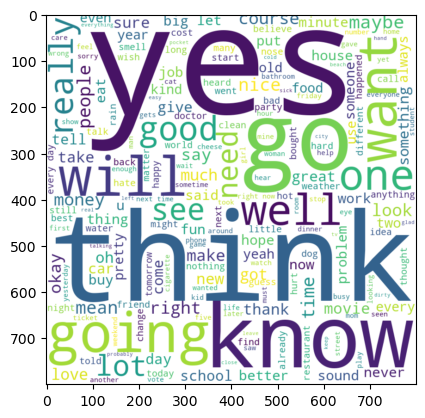

In [101]:
plt.imshow(wordcloud,
interpolation='bilinear')           
plt.show()


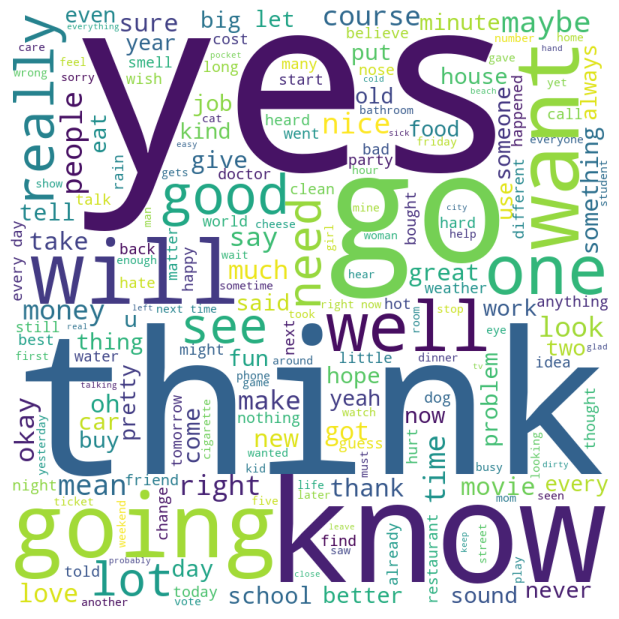

In [102]:
plt.figure(figsize=(6,6),facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [103]:
    # cleaning text
    data = data.replace("he's","he is")
    data = data.replace("she's","she is")
    data = data.replace("it's","it is")
    data = data.replace("that's","that is")
    data = data.replace("what's","what is")
    data = data.replace("where's","where is")
    data = data.replace("how's","how is")
    data = data.replace("\'ll"," will")
    data = data.replace("\'ve"," have")
    data = data.replace("\'re"," are")
    data = data.replace("\'d"," would")
    data = data.replace("won't","will not")
    data = data.replace("can't","can not")
    data = data.replace("n't"," not")
    data = data.replace("'bout","about")
    data= data.replace("'til","until")
    print(data)

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i have been great. what about you?
i have been great. what about you?	i have been good. i'm in school right now.
i have been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it is okay. it is a really big campus.
it is okay. it is a really big campus.	good luck with school.
good luck with school.	thank you very much.
how is it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i have actually been pretty good. you?
i have actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?

In [104]:
x_train, x_test, y_train, y_test=train_test_split(data,data,test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train,test_size=0.2,random_state=42)

In [112]:
model=Sequential()
model.add(SimpleRNN(10, input_shape=(1,1)))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=1)


Epoch 1/100


ValueError: in user code:

    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_34" (type Sequential).
    
    Input 0 of layer "simple_rnn_33" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (1,)
    
    Call arguments received by layer "sequential_34" (type Sequential):
      • inputs=tf.Tensor(shape=(1,), dtype=string)
      • training=True
      • mask=None


In [113]:
score= model.evaluate(x_val,y_val,batch_size=1)
print(score)

ValueError: in user code:

    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\training.py", line 1499, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\hp\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_34" (type Sequential).
    
    Input 0 of layer "simple_rnn_33" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (1,)
    
    Call arguments received by layer "sequential_34" (type Sequential):
      • inputs=tf.Tensor(shape=(1,), dtype=string)
      • training=False
      • mask=None
